In [140]:
!pip install librosa
!pip install -U numba

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers

import warnings

/home/past/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-04-24 20:17:00.263363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 20:17:00.583676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-24 20:17:00.583699: I tensorflow/c

In [2]:
#Reading the audio directory and extracting lalels to categorise each individual audio into different classes
root_dir = Path(r'archive/Crema')
filepaths = list(root_dir.glob(r'*.wav'))
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))

In [3]:
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

In [4]:
#ANG - Anger
#DIS - Disgust
#FEA - Fear
#HAP - Happiness
#NEU - Neutral
#SAD - Sadness

In [5]:
#Making the dataset for training the model later
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

audio_df = pd.concat([filepaths, labels], axis=1)
audio_df

,Filepath,Label
0,archive/Crema/1017_WSI_HAP_XX.wav,HAP
1,archive/Crema/1018_IWL_ANG_XX.wav,ANG
2,archive/Crema/1038_TAI_FEA_XX.wav,FEA
3,archive/Crema/1067_IWW_NEU_XX.wav,NEU
4,archive/Crema/1076_DFA_FEA_XX.wav,FEA
...,...,...
7437,archive/Crema/1068_IWL_NEU_XX.wav,NEU
7438,archive/Crema/1008_IEO_HAP_MD.wav,HAP
7439,archive/Crema/1047_IEO_FEA_HI.wav,FEA
7440,archive/Crema/1041_TAI_ANG_XX.wav,ANG


<Axes: xlabel='Label', ylabel='Count'>

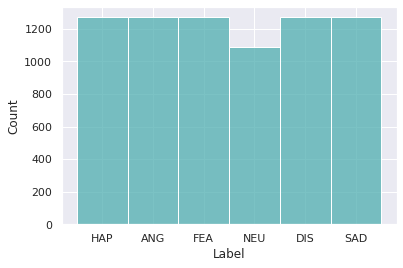

In [6]:
#Visualizing the Data
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')
sns.histplot(labels, color='#4FAEB0')

In [7]:
#Same number of files for all emotions except neutral, but the difference is not significant enough to require the use of oversampling.

In [8]:
audio_arrays = []

for i in audio_df['Filepath']:
    print(i)
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)
    
audio_df['Arrays'] = audio_arrays

archive/Crema/1017_WSI_HAP_XX.wav
archive/Crema/1018_IWL_ANG_XX.wav
archive/Crema/1038_TAI_FEA_XX.wav
archive/Crema/1067_IWW_NEU_XX.wav
archive/Crema/1076_DFA_FEA_XX.wav
archive/Crema/1017_ITS_ANG_XX.wav
archive/Crema/1076_TSI_FEA_XX.wav
archive/Crema/1035_IEO_DIS_HI.wav
archive/Crema/1042_DFA_FEA_XX.wav
archive/Crema/1007_TSI_FEA_XX.wav
archive/Crema/1019_IOM_SAD_XX.wav
archive/Crema/1043_IEO_DIS_MD.wav
archive/Crema/1012_IEO_DIS_HI.wav
archive/Crema/1038_IEO_HAP_LO.wav
archive/Crema/1085_IOM_FEA_XX.wav
archive/Crema/1056_IWW_FEA_XX.wav
archive/Crema/1085_IEO_DIS_LO.wav
archive/Crema/1013_IOM_SAD_XX.wav
archive/Crema/1049_TIE_ANG_XX.wav
archive/Crema/1072_IWL_FEA_XX.wav
archive/Crema/1057_WSI_FEA_XX.wav
archive/Crema/1066_DFA_SAD_XX.wav
archive/Crema/1047_ITS_DIS_XX.wav
archive/Crema/1059_WSI_DIS_XX.wav
archive/Crema/1008_DFA_DIS_XX.wav
archive/Crema/1056_DFA_DIS_XX.wav
archive/Crema/1021_ITS_HAP_XX.wav
archive/Crema/1072_WSI_SAD_XX.wav
archive/Crema/1043_IEO_SAD_HI.wav
archive/Crema/

archive/Crema/1074_IOM_FEA_XX.wav
archive/Crema/1066_TAI_DIS_XX.wav
archive/Crema/1057_IEO_SAD_HI.wav
archive/Crema/1017_IEO_DIS_HI.wav
archive/Crema/1079_MTI_HAP_XX.wav
archive/Crema/1035_ITH_SAD_XX.wav
archive/Crema/1002_DFA_NEU_XX.wav
archive/Crema/1071_IWL_FEA_XX.wav
archive/Crema/1058_IEO_ANG_MD.wav
archive/Crema/1001_MTI_NEU_XX.wav
archive/Crema/1030_ITS_FEA_XX.wav
archive/Crema/1018_IOM_FEA_XX.wav
archive/Crema/1055_ITH_HAP_XX.wav
archive/Crema/1059_TAI_ANG_XX.wav
archive/Crema/1006_IWL_DIS_XX.wav
archive/Crema/1062_MTI_SAD_XX.wav
archive/Crema/1041_IWL_ANG_XX.wav
archive/Crema/1048_TSI_HAP_XX.wav
archive/Crema/1044_IEO_NEU_XX.wav
archive/Crema/1029_TAI_DIS_XX.wav
archive/Crema/1039_DFA_NEU_XX.wav
archive/Crema/1013_WSI_FEA_XX.wav
archive/Crema/1046_WSI_FEA_XX.wav
archive/Crema/1014_TSI_SAD_XX.wav
archive/Crema/1035_IEO_HAP_HI.wav
archive/Crema/1054_ITS_SAD_XX.wav
archive/Crema/1084_TAI_ANG_XX.wav
archive/Crema/1069_IEO_ANG_LO.wav
archive/Crema/1070_IEO_HAP_LO.wav
archive/Crema/

archive/Crema/1048_IEO_FEA_LO.wav
archive/Crema/1027_WSI_FEA_XX.wav
archive/Crema/1074_IEO_HAP_LO.wav
archive/Crema/1021_TAI_HAP_XX.wav
archive/Crema/1061_MTI_SAD_XX.wav
archive/Crema/1016_IWW_FEA_XX.wav
archive/Crema/1006_IWW_FEA_XX.wav
archive/Crema/1031_IEO_DIS_LO.wav
archive/Crema/1008_MTI_DIS_XX.wav
archive/Crema/1013_IWW_ANG_XX.wav
archive/Crema/1052_WSI_DIS_XX.wav
archive/Crema/1073_IOM_FEA_XX.wav
archive/Crema/1064_DFA_ANG_XX.wav
archive/Crema/1080_IWW_SAD_XX.wav
archive/Crema/1060_IWL_DIS_XX.wav
archive/Crema/1067_WSI_SAD_XX.wav
archive/Crema/1013_TAI_NEU_XX.wav
archive/Crema/1003_WSI_NEU_XX.wav
archive/Crema/1009_IOM_SAD_XX.wav
archive/Crema/1040_IWL_ANG_XX.wav
archive/Crema/1048_TIE_ANG_XX.wav
archive/Crema/1061_DFA_NEU_XX.wav
archive/Crema/1016_IEO_DIS_HI.wav
archive/Crema/1060_ITH_HAP_XX.wav
archive/Crema/1039_TSI_ANG_XX.wav
archive/Crema/1022_IEO_SAD_HI.wav
archive/Crema/1030_IEO_SAD_LO.wav
archive/Crema/1068_DFA_DIS_XX.wav
archive/Crema/1057_WSI_DIS_XX.wav
archive/Crema/

archive/Crema/1013_TSI_FEA_XX.wav
archive/Crema/1083_IEO_HAP_LO.wav
archive/Crema/1065_ITH_SAD_XX.wav
archive/Crema/1080_WSI_HAP_XX.wav
archive/Crema/1007_TSI_NEU_XX.wav
archive/Crema/1001_ITS_ANG_XX.wav
archive/Crema/1047_IEO_SAD_MD.wav
archive/Crema/1053_ITS_ANG_XX.wav
archive/Crema/1071_ITS_FEA_XX.wav
archive/Crema/1084_IOM_HAP_XX.wav
archive/Crema/1021_TAI_NEU_XX.wav
archive/Crema/1079_IEO_FEA_MD.wav
archive/Crema/1070_TIE_HAP_XX.wav
archive/Crema/1038_ITS_HAP_XX.wav
archive/Crema/1016_ITS_SAD_XX.wav
archive/Crema/1041_ITS_NEU_XX.wav
archive/Crema/1010_ITH_SAD_XX.wav
archive/Crema/1077_IEO_SAD_HI.wav
archive/Crema/1042_IWL_FEA_XX.wav
archive/Crema/1004_WSI_ANG_XX.wav
archive/Crema/1024_IWL_SAD_XX.wav
archive/Crema/1008_IEO_DIS_HI.wav
archive/Crema/1029_TAI_NEU_XX.wav
archive/Crema/1025_MTI_DIS_XX.wav
archive/Crema/1043_TSI_SAD_XX.wav
archive/Crema/1012_TAI_SAD_XX.wav
archive/Crema/1090_ITH_ANG_XX.wav
archive/Crema/1041_IEO_HAP_MD.wav
archive/Crema/1089_TIE_DIS_XX.wav
archive/Crema/

archive/Crema/1012_IEO_SAD_HI.wav
archive/Crema/1047_IWL_ANG_XX.wav
archive/Crema/1048_IEO_HAP_HI.wav
archive/Crema/1066_IEO_FEA_HI.wav
archive/Crema/1041_IWL_DIS_XX.wav
archive/Crema/1090_TAI_DIS_XX.wav
archive/Crema/1070_IEO_FEA_LO.wav
archive/Crema/1042_WSI_DIS_XX.wav
archive/Crema/1091_ITH_FEA_XX.wav
archive/Crema/1002_IEO_ANG_HI.wav
archive/Crema/1026_IEO_HAP_MD.wav
archive/Crema/1049_IOM_HAP_XX.wav
archive/Crema/1014_IEO_SAD_MD.wav
archive/Crema/1064_IOM_HAP_XX.wav
archive/Crema/1082_IWL_FEA_XX.wav
archive/Crema/1086_IEO_SAD_MD.wav
archive/Crema/1031_DFA_ANG_XX.wav
archive/Crema/1023_IWL_ANG_XX.wav
archive/Crema/1075_IEO_ANG_LO.wav
archive/Crema/1004_WSI_DIS_XX.wav
archive/Crema/1003_TAI_HAP_XX.wav
archive/Crema/1018_IOM_DIS_XX.wav
archive/Crema/1050_ITH_ANG_XX.wav
archive/Crema/1004_TSI_SAD_XX.wav
archive/Crema/1041_IEO_FEA_MD.wav
archive/Crema/1025_TSI_ANG_XX.wav
archive/Crema/1082_IWW_FEA_XX.wav
archive/Crema/1082_IEO_NEU_XX.wav
archive/Crema/1007_TAI_NEU_XX.wav
archive/Crema/

archive/Crema/1064_ITH_DIS_XX.wav
archive/Crema/1015_IWW_SAD_XX.wav
archive/Crema/1022_IOM_HAP_XX.wav
archive/Crema/1033_IWW_FEA_XX.wav
archive/Crema/1084_WSI_NEU_XX.wav
archive/Crema/1013_IWL_FEA_XX.wav
archive/Crema/1004_IEO_SAD_HI.wav
archive/Crema/1014_TIE_NEU_XX.wav
archive/Crema/1014_ITS_DIS_XX.wav
archive/Crema/1012_DFA_DIS_XX.wav
archive/Crema/1076_IEO_DIS_HI.wav
archive/Crema/1081_IEO_FEA_LO.wav
archive/Crema/1047_IEO_DIS_LO.wav
archive/Crema/1019_IEO_SAD_MD.wav
archive/Crema/1041_IEO_ANG_LO.wav
archive/Crema/1040_DFA_FEA_XX.wav
archive/Crema/1018_IEO_DIS_MD.wav
archive/Crema/1090_TSI_DIS_XX.wav
archive/Crema/1058_IEO_NEU_XX.wav
archive/Crema/1015_TAI_NEU_XX.wav
archive/Crema/1023_TIE_ANG_XX.wav
archive/Crema/1047_IWW_FEA_XX.wav
archive/Crema/1062_ITS_FEA_XX.wav
archive/Crema/1070_IEO_ANG_LO.wav
archive/Crema/1060_IWL_ANG_XX.wav
archive/Crema/1025_IWL_ANG_XX.wav
archive/Crema/1048_TIE_NEU_XX.wav
archive/Crema/1043_IEO_FEA_HI.wav
archive/Crema/1066_TIE_SAD_XX.wav
archive/Crema/

archive/Crema/1078_ITS_HAP_XX.wav
archive/Crema/1052_TIE_HAP_XX.wav
archive/Crema/1062_MTI_FEA_XX.wav
archive/Crema/1060_IWW_HAP_XX.wav
archive/Crema/1039_IWW_ANG_XX.wav
archive/Crema/1083_IOM_HAP_XX.wav
archive/Crema/1057_WSI_NEU_XX.wav
archive/Crema/1011_TIE_ANG_XX.wav
archive/Crema/1039_ITS_NEU_XX.wav
archive/Crema/1007_TAI_SAD_XX.wav
archive/Crema/1047_IOM_DIS_XX.wav
archive/Crema/1027_TAI_NEU_XX.wav
archive/Crema/1067_IEO_ANG_LO.wav
archive/Crema/1086_TIE_NEU_XX.wav
archive/Crema/1073_WSI_ANG_XX.wav
archive/Crema/1067_IWW_DIS_XX.wav
archive/Crema/1058_DFA_SAD_XX.wav
archive/Crema/1040_IOM_HAP_XX.wav
archive/Crema/1057_ITH_FEA_XX.wav
archive/Crema/1063_IWL_DIS_XX.wav
archive/Crema/1013_IEO_DIS_LO.wav
archive/Crema/1014_IEO_ANG_HI.wav
archive/Crema/1073_ITS_NEU_XX.wav
archive/Crema/1080_MTI_ANG_XX.wav
archive/Crema/1044_TSI_ANG_XX.wav
archive/Crema/1049_TIE_DIS_XX.wav
archive/Crema/1042_MTI_HAP_XX.wav
archive/Crema/1045_IEO_HAP_HI.wav
archive/Crema/1017_ITH_SAD_XX.wav
archive/Crema/

archive/Crema/1003_IWL_SAD_XX.wav
archive/Crema/1003_DFA_ANG_XX.wav
archive/Crema/1073_IEO_ANG_LO.wav
archive/Crema/1001_IEO_DIS_MD.wav
archive/Crema/1030_ITH_FEA_XX.wav
archive/Crema/1074_TIE_DIS_XX.wav
archive/Crema/1011_TAI_NEU_XX.wav
archive/Crema/1071_TAI_SAD_XX.wav
archive/Crema/1089_MTI_SAD_XX.wav
archive/Crema/1016_IOM_ANG_XX.wav
archive/Crema/1050_IEO_HAP_MD.wav
archive/Crema/1089_TSI_HAP_XX.wav
archive/Crema/1066_ITS_ANG_XX.wav
archive/Crema/1049_IOM_ANG_XX.wav
archive/Crema/1026_IEO_NEU_XX.wav
archive/Crema/1008_MTI_HAP_XX.wav
archive/Crema/1061_IWL_NEU_XX.wav
archive/Crema/1077_TIE_NEU_XX.wav
archive/Crema/1005_TSI_FEA_XX.wav
archive/Crema/1073_TIE_HAP_XX.wav
archive/Crema/1012_IEO_SAD_MD.wav
archive/Crema/1056_ITH_SAD_XX.wav
archive/Crema/1026_TAI_ANG_XX.wav
archive/Crema/1091_IEO_HAP_HI.wav
archive/Crema/1039_MTI_HAP_XX.wav
archive/Crema/1078_TSI_DIS_XX.wav
archive/Crema/1029_ITS_FEA_XX.wav
archive/Crema/1024_IEO_ANG_LO.wav
archive/Crema/1064_ITH_ANG_XX.wav
archive/Crema/

archive/Crema/1050_IEO_HAP_HI.wav
archive/Crema/1041_IEO_ANG_MD.wav
archive/Crema/1053_TAI_HAP_XX.wav
archive/Crema/1082_TAI_FEA_XX.wav
archive/Crema/1030_MTI_SAD_XX.wav
archive/Crema/1001_IOM_HAP_XX.wav
archive/Crema/1090_MTI_SAD_XX.wav
archive/Crema/1075_TAI_HAP_XX.wav
archive/Crema/1060_MTI_FEA_XX.wav
archive/Crema/1064_IEO_HAP_MD.wav
archive/Crema/1031_WSI_SAD_XX.wav
archive/Crema/1037_IOM_FEA_XX.wav
archive/Crema/1032_TAI_DIS_XX.wav
archive/Crema/1076_WSI_ANG_XX.wav
archive/Crema/1027_TSI_ANG_XX.wav
archive/Crema/1005_MTI_NEU_XX.wav
archive/Crema/1011_ITH_DIS_XX.wav
archive/Crema/1076_ITH_SAD_XX.wav
archive/Crema/1003_WSI_FEA_XX.wav
archive/Crema/1049_TAI_NEU_XX.wav
archive/Crema/1069_ITH_FEA_XX.wav
archive/Crema/1057_IOM_ANG_XX.wav
archive/Crema/1072_ITS_SAD_XX.wav
archive/Crema/1046_TAI_HAP_XX.wav
archive/Crema/1046_IWW_SAD_XX.wav
archive/Crema/1002_TIE_ANG_XX.wav
archive/Crema/1055_IEO_NEU_XX.wav
archive/Crema/1005_IEO_SAD_LO.wav
archive/Crema/1081_TIE_FEA_XX.wav
archive/Crema/

archive/Crema/1046_DFA_NEU_XX.wav
archive/Crema/1038_IOM_ANG_XX.wav
archive/Crema/1061_IEO_ANG_MD.wav
archive/Crema/1061_DFA_SAD_XX.wav
archive/Crema/1054_IEO_NEU_XX.wav
archive/Crema/1079_MTI_ANG_XX.wav
archive/Crema/1091_MTI_FEA_XX.wav
archive/Crema/1042_IEO_DIS_LO.wav
archive/Crema/1061_ITH_HAP_XX.wav
archive/Crema/1007_IWL_ANG_XX.wav
archive/Crema/1069_IWW_DIS_XX.wav
archive/Crema/1089_IWL_SAD_XX.wav
archive/Crema/1048_IWW_FEA_XX.wav
archive/Crema/1021_WSI_SAD_XX.wav
archive/Crema/1063_DFA_ANG_XX.wav
archive/Crema/1040_WSI_DIS_XX.wav
archive/Crema/1034_IWL_FEA_XX.wav
archive/Crema/1023_TIE_FEA_XX.wav
archive/Crema/1074_IEO_SAD_MD.wav
archive/Crema/1001_WSI_ANG_XX.wav
archive/Crema/1087_TSI_FEA_XX.wav
archive/Crema/1071_IOM_DIS_XX.wav
archive/Crema/1071_IOM_SAD_XX.wav
archive/Crema/1017_IWL_ANG_XX.wav
archive/Crema/1047_TAI_SAD_XX.wav
archive/Crema/1027_WSI_ANG_XX.wav
archive/Crema/1007_TIE_SAD_XX.wav
archive/Crema/1078_WSI_HAP_XX.wav
archive/Crema/1067_MTI_HAP_XX.wav
archive/Crema/

archive/Crema/1046_IEO_SAD_LO.wav
archive/Crema/1031_TSI_ANG_XX.wav
archive/Crema/1072_ITS_DIS_XX.wav
archive/Crema/1019_IEO_FEA_MD.wav
archive/Crema/1059_IEO_HAP_HI.wav
archive/Crema/1086_IEO_HAP_LO.wav
archive/Crema/1054_TSI_SAD_XX.wav
archive/Crema/1013_TSI_HAP_XX.wav
archive/Crema/1052_TIE_SAD_XX.wav
archive/Crema/1057_IEO_SAD_LO.wav
archive/Crema/1009_ITS_HAP_XX.wav
archive/Crema/1071_WSI_ANG_XX.wav
archive/Crema/1083_TAI_NEU_XX.wav
archive/Crema/1029_TAI_SAD_XX.wav
archive/Crema/1087_ITS_FEA_XX.wav
archive/Crema/1050_DFA_ANG_XX.wav
archive/Crema/1008_IWL_DIS_XX.wav
archive/Crema/1035_TSI_SAD_XX.wav
archive/Crema/1021_TSI_NEU_XX.wav
archive/Crema/1065_IEO_DIS_HI.wav
archive/Crema/1030_MTI_DIS_XX.wav
archive/Crema/1080_WSI_SAD_XX.wav
archive/Crema/1078_IEO_FEA_MD.wav
archive/Crema/1065_TIE_FEA_XX.wav
archive/Crema/1018_IEO_DIS_HI.wav
archive/Crema/1055_MTI_SAD_XX.wav
archive/Crema/1020_DFA_HAP_XX.wav
archive/Crema/1072_MTI_FEA_XX.wav
archive/Crema/1026_IEO_ANG_LO.wav
archive/Crema/

archive/Crema/1041_IEO_DIS_HI.wav
archive/Crema/1066_DFA_ANG_XX.wav
archive/Crema/1048_IEO_DIS_LO.wav
archive/Crema/1035_IWL_DIS_XX.wav
archive/Crema/1005_TAI_ANG_XX.wav
archive/Crema/1024_IEO_FEA_LO.wav
archive/Crema/1063_IOM_SAD_XX.wav
archive/Crema/1027_IOM_DIS_XX.wav
archive/Crema/1001_IEO_DIS_HI.wav
archive/Crema/1018_ITH_ANG_XX.wav
archive/Crema/1055_TIE_NEU_XX.wav
archive/Crema/1043_ITH_HAP_XX.wav
archive/Crema/1014_IEO_ANG_MD.wav
archive/Crema/1011_IWW_ANG_XX.wav
archive/Crema/1045_ITS_FEA_XX.wav
archive/Crema/1056_MTI_SAD_XX.wav
archive/Crema/1082_IEO_ANG_LO.wav
archive/Crema/1034_IEO_DIS_LO.wav
archive/Crema/1066_IEO_SAD_MD.wav
archive/Crema/1085_TAI_NEU_XX.wav
archive/Crema/1035_ITS_ANG_XX.wav
archive/Crema/1041_MTI_SAD_XX.wav
archive/Crema/1042_IOM_ANG_XX.wav
archive/Crema/1002_IWL_HAP_XX.wav
archive/Crema/1012_IOM_DIS_XX.wav
archive/Crema/1076_MTI_HAP_XX.wav
archive/Crema/1051_MTI_FEA_XX.wav
archive/Crema/1033_MTI_NEU_XX.wav
archive/Crema/1029_TSI_NEU_XX.wav
archive/Crema/

archive/Crema/1048_MTI_FEA_XX.wav
archive/Crema/1057_IWL_FEA_XX.wav
archive/Crema/1076_DFA_DIS_XX.wav
archive/Crema/1033_IEO_NEU_XX.wav
archive/Crema/1084_DFA_HAP_XX.wav
archive/Crema/1019_IOM_ANG_XX.wav
archive/Crema/1069_DFA_FEA_XX.wav
archive/Crema/1061_IEO_SAD_MD.wav
archive/Crema/1055_ITS_DIS_XX.wav
archive/Crema/1003_DFA_DIS_XX.wav
archive/Crema/1089_IWW_DIS_XX.wav
archive/Crema/1049_TSI_FEA_XX.wav
archive/Crema/1044_IEO_FEA_HI.wav
archive/Crema/1025_IEO_HAP_HI.wav
archive/Crema/1044_ITH_ANG_XX.wav
archive/Crema/1058_TIE_NEU_XX.wav
archive/Crema/1090_IEO_ANG_HI.wav
archive/Crema/1054_IEO_DIS_HI.wav
archive/Crema/1021_IEO_SAD_LO.wav
archive/Crema/1075_IWL_HAP_XX.wav
archive/Crema/1005_ITS_FEA_XX.wav
archive/Crema/1062_DFA_DIS_XX.wav
archive/Crema/1011_IEO_DIS_MD.wav
archive/Crema/1041_IWL_NEU_XX.wav
archive/Crema/1085_TIE_FEA_XX.wav
archive/Crema/1030_ITH_DIS_XX.wav
archive/Crema/1060_TIE_SAD_XX.wav
archive/Crema/1028_DFA_ANG_XX.wav
archive/Crema/1010_DFA_FEA_XX.wav
archive/Crema/

archive/Crema/1029_IEO_HAP_HI.wav
archive/Crema/1054_IEO_DIS_MD.wav
archive/Crema/1072_IOM_DIS_XX.wav
archive/Crema/1042_IEO_ANG_LO.wav
archive/Crema/1026_IWW_ANG_XX.wav
archive/Crema/1081_TIE_HAP_XX.wav
archive/Crema/1033_TAI_HAP_XX.wav
archive/Crema/1071_ITH_DIS_XX.wav
archive/Crema/1009_TIE_NEU_XX.wav
archive/Crema/1022_TIE_ANG_XX.wav
archive/Crema/1074_DFA_ANG_XX.wav
archive/Crema/1010_IEO_FEA_HI.wav
archive/Crema/1089_MTI_DIS_XX.wav
archive/Crema/1014_IWL_DIS_XX.wav
archive/Crema/1012_TIE_FEA_XX.wav
archive/Crema/1082_IEO_HAP_LO.wav
archive/Crema/1034_IEO_DIS_HI.wav
archive/Crema/1044_ITH_FEA_XX.wav
archive/Crema/1064_TAI_SAD_XX.wav
archive/Crema/1026_TSI_SAD_XX.wav
archive/Crema/1036_DFA_ANG_XX.wav
archive/Crema/1055_TAI_NEU_XX.wav
archive/Crema/1012_WSI_DIS_XX.wav
archive/Crema/1091_ITH_DIS_XX.wav
archive/Crema/1017_TIE_FEA_XX.wav
archive/Crema/1053_ITH_HAP_XX.wav
archive/Crema/1028_TIE_SAD_XX.wav
archive/Crema/1008_ITH_SAD_XX.wav
archive/Crema/1057_IEO_DIS_MD.wav
archive/Crema/

archive/Crema/1035_WSI_NEU_XX.wav
archive/Crema/1030_ITS_HAP_XX.wav
archive/Crema/1074_ITH_ANG_XX.wav
archive/Crema/1065_IEO_ANG_LO.wav
archive/Crema/1026_TAI_NEU_XX.wav
archive/Crema/1016_MTI_HAP_XX.wav
archive/Crema/1002_IEO_SAD_HI.wav
archive/Crema/1051_IWW_NEU_XX.wav
archive/Crema/1067_IOM_NEU_XX.wav
archive/Crema/1031_ITS_HAP_XX.wav
archive/Crema/1029_WSI_FEA_XX.wav
archive/Crema/1040_TAI_HAP_XX.wav
archive/Crema/1062_TIE_SAD_XX.wav
archive/Crema/1053_MTI_HAP_XX.wav
archive/Crema/1066_TAI_SAD_XX.wav
archive/Crema/1061_IWW_HAP_XX.wav
archive/Crema/1051_IEO_HAP_MD.wav
archive/Crema/1079_IWL_HAP_XX.wav
archive/Crema/1037_IWL_HAP_XX.wav
archive/Crema/1014_DFA_HAP_XX.wav
archive/Crema/1028_IEO_HAP_MD.wav
archive/Crema/1057_DFA_HAP_XX.wav
archive/Crema/1034_DFA_ANG_XX.wav
archive/Crema/1048_IWL_HAP_XX.wav
archive/Crema/1083_TAI_ANG_XX.wav
archive/Crema/1057_ITS_NEU_XX.wav
archive/Crema/1002_WSI_NEU_XX.wav
archive/Crema/1059_IWL_NEU_XX.wav
archive/Crema/1053_TSI_SAD_XX.wav
archive/Crema/

archive/Crema/1083_ITH_DIS_XX.wav
archive/Crema/1069_IWL_DIS_XX.wav
archive/Crema/1025_TIE_NEU_XX.wav
archive/Crema/1049_IEO_ANG_MD.wav
archive/Crema/1086_ITS_DIS_XX.wav
archive/Crema/1048_IEO_ANG_MD.wav
archive/Crema/1062_IWW_DIS_XX.wav
archive/Crema/1075_IEO_FEA_LO.wav
archive/Crema/1023_TAI_SAD_XX.wav
archive/Crema/1013_ITH_ANG_XX.wav
archive/Crema/1080_ITH_FEA_XX.wav
archive/Crema/1024_WSI_NEU_XX.wav
archive/Crema/1041_TSI_HAP_XX.wav
archive/Crema/1065_TIE_HAP_XX.wav
archive/Crema/1058_IEO_HAP_HI.wav
archive/Crema/1048_IOM_FEA_XX.wav
archive/Crema/1040_WSI_FEA_XX.wav
archive/Crema/1007_IEO_DIS_LO.wav
archive/Crema/1074_IWW_FEA_XX.wav
archive/Crema/1057_TSI_SAD_XX.wav
archive/Crema/1022_TAI_FEA_XX.wav
archive/Crema/1054_DFA_HAP_XX.wav
archive/Crema/1024_IOM_ANG_XX.wav
archive/Crema/1029_ITS_DIS_XX.wav
archive/Crema/1001_TIE_HAP_XX.wav
archive/Crema/1088_TAI_NEU_XX.wav
archive/Crema/1050_WSI_ANG_XX.wav
archive/Crema/1091_IEO_DIS_MD.wav
archive/Crema/1035_TIE_SAD_XX.wav
archive/Crema/

archive/Crema/1016_IWL_DIS_XX.wav
archive/Crema/1003_ITH_SAD_XX.wav
archive/Crema/1011_WSI_DIS_XX.wav
archive/Crema/1052_TAI_SAD_XX.wav
archive/Crema/1079_DFA_HAP_XX.wav
archive/Crema/1006_TAI_NEU_XX.wav
archive/Crema/1089_WSI_SAD_XX.wav
archive/Crema/1075_IWL_DIS_XX.wav
archive/Crema/1075_IEO_SAD_MD.wav
archive/Crema/1008_TIE_HAP_XX.wav
archive/Crema/1090_MTI_DIS_XX.wav
archive/Crema/1063_TAI_DIS_XX.wav
archive/Crema/1071_IWL_SAD_XX.wav
archive/Crema/1023_ITS_SAD_XX.wav
archive/Crema/1086_IEO_FEA_HI.wav
archive/Crema/1003_MTI_SAD_XX.wav
archive/Crema/1073_IWW_FEA_XX.wav
archive/Crema/1040_TSI_ANG_XX.wav
archive/Crema/1033_MTI_DIS_XX.wav
archive/Crema/1067_TAI_SAD_XX.wav
archive/Crema/1017_IWL_SAD_XX.wav
archive/Crema/1043_IOM_FEA_XX.wav
archive/Crema/1005_IEO_ANG_HI.wav
archive/Crema/1027_TAI_SAD_XX.wav
archive/Crema/1005_TAI_HAP_XX.wav
archive/Crema/1065_TAI_DIS_XX.wav
archive/Crema/1073_WSI_DIS_XX.wav
archive/Crema/1082_IEO_SAD_HI.wav
archive/Crema/1035_ITH_ANG_XX.wav
archive/Crema/

archive/Crema/1074_IWL_HAP_XX.wav
archive/Crema/1003_TIE_DIS_XX.wav
archive/Crema/1039_IWW_SAD_XX.wav
archive/Crema/1011_IEO_NEU_XX.wav
archive/Crema/1077_DFA_SAD_XX.wav
archive/Crema/1015_IEO_FEA_MD.wav
archive/Crema/1052_ITH_DIS_XX.wav
archive/Crema/1082_IOM_NEU_XX.wav
archive/Crema/1019_MTI_ANG_XX.wav
archive/Crema/1053_IEO_SAD_HI.wav
archive/Crema/1034_TAI_DIS_XX.wav
archive/Crema/1023_ITH_ANG_XX.wav
archive/Crema/1091_TIE_FEA_XX.wav
archive/Crema/1025_TAI_FEA_XX.wav
archive/Crema/1001_ITS_DIS_XX.wav
archive/Crema/1056_IEO_HAP_HI.wav
archive/Crema/1010_WSI_ANG_XX.wav
archive/Crema/1024_IEO_NEU_XX.wav
archive/Crema/1044_ITH_DIS_XX.wav
archive/Crema/1065_WSI_SAD_XX.wav
archive/Crema/1087_IWW_SAD_XX.wav
archive/Crema/1019_MTI_SAD_XX.wav
archive/Crema/1008_ITS_NEU_XX.wav
archive/Crema/1065_ITS_ANG_XX.wav
archive/Crema/1058_IEO_DIS_MD.wav
archive/Crema/1034_IOM_NEU_XX.wav
archive/Crema/1045_ITH_FEA_XX.wav
archive/Crema/1082_IEO_HAP_HI.wav
archive/Crema/1075_TAI_NEU_XX.wav
archive/Crema/

archive/Crema/1054_ITH_HAP_XX.wav
archive/Crema/1004_ITS_DIS_XX.wav
archive/Crema/1038_TAI_HAP_XX.wav
archive/Crema/1017_IEO_HAP_HI.wav
archive/Crema/1065_IEO_FEA_HI.wav
archive/Crema/1069_WSI_HAP_XX.wav
archive/Crema/1027_IEO_FEA_LO.wav
archive/Crema/1032_TIE_SAD_XX.wav
archive/Crema/1001_MTI_SAD_XX.wav
archive/Crema/1040_TAI_FEA_XX.wav
archive/Crema/1030_ITS_NEU_XX.wav
archive/Crema/1035_IOM_DIS_XX.wav
archive/Crema/1083_DFA_ANG_XX.wav
archive/Crema/1023_IEO_HAP_MD.wav
archive/Crema/1068_IEO_HAP_HI.wav
archive/Crema/1040_IOM_DIS_XX.wav
archive/Crema/1019_MTI_NEU_XX.wav
archive/Crema/1058_IOM_SAD_XX.wav
archive/Crema/1082_IWW_SAD_XX.wav
archive/Crema/1028_IWL_SAD_XX.wav
archive/Crema/1017_DFA_ANG_XX.wav
archive/Crema/1001_TSI_ANG_XX.wav
archive/Crema/1001_MTI_ANG_XX.wav
archive/Crema/1019_IOM_FEA_XX.wav
archive/Crema/1075_IEO_DIS_MD.wav
archive/Crema/1010_ITS_FEA_XX.wav
archive/Crema/1036_WSI_NEU_XX.wav
archive/Crema/1068_TAI_SAD_XX.wav
archive/Crema/1036_WSI_FEA_XX.wav
archive/Crema/

archive/Crema/1060_TSI_SAD_XX.wav
archive/Crema/1042_MTI_ANG_XX.wav
archive/Crema/1057_ITH_HAP_XX.wav
archive/Crema/1083_ITS_SAD_XX.wav
archive/Crema/1055_TSI_HAP_XX.wav
archive/Crema/1011_TAI_ANG_XX.wav
archive/Crema/1012_TSI_HAP_XX.wav
archive/Crema/1020_TAI_SAD_XX.wav
archive/Crema/1062_ITH_FEA_XX.wav
archive/Crema/1021_TIE_ANG_XX.wav
archive/Crema/1055_MTI_DIS_XX.wav
archive/Crema/1080_IWW_ANG_XX.wav
archive/Crema/1037_TAI_DIS_XX.wav
archive/Crema/1062_ITH_NEU_XX.wav
archive/Crema/1058_ITH_DIS_XX.wav
archive/Crema/1074_MTI_DIS_XX.wav
archive/Crema/1027_MTI_DIS_XX.wav
archive/Crema/1076_ITS_DIS_XX.wav
archive/Crema/1007_IWL_SAD_XX.wav
archive/Crema/1009_IEO_FEA_MD.wav
archive/Crema/1059_ITS_FEA_XX.wav
archive/Crema/1063_IOM_HAP_XX.wav
archive/Crema/1076_MTI_FEA_XX.wav
archive/Crema/1001_IWL_SAD_XX.wav
archive/Crema/1052_ITH_NEU_XX.wav
archive/Crema/1064_TSI_HAP_XX.wav
archive/Crema/1084_ITS_ANG_XX.wav
archive/Crema/1080_IWL_SAD_XX.wav
archive/Crema/1073_IWW_NEU_XX.wav
archive/Crema/

archive/Crema/1007_TAI_DIS_XX.wav
archive/Crema/1006_TAI_DIS_XX.wav
archive/Crema/1019_MTI_FEA_XX.wav
archive/Crema/1091_TAI_HAP_XX.wav
archive/Crema/1051_IOM_SAD_XX.wav
archive/Crema/1038_TAI_DIS_XX.wav
archive/Crema/1079_TAI_HAP_XX.wav
archive/Crema/1079_IEO_SAD_HI.wav
archive/Crema/1086_TSI_NEU_XX.wav
archive/Crema/1019_ITS_DIS_XX.wav
archive/Crema/1072_DFA_NEU_XX.wav
archive/Crema/1007_MTI_ANG_XX.wav
archive/Crema/1040_IEO_DIS_MD.wav
archive/Crema/1022_IWL_NEU_XX.wav
archive/Crema/1016_IOM_HAP_XX.wav
archive/Crema/1041_IWW_DIS_XX.wav
archive/Crema/1053_TIE_NEU_XX.wav
archive/Crema/1066_WSI_FEA_XX.wav
archive/Crema/1070_TSI_NEU_XX.wav
archive/Crema/1061_TSI_ANG_XX.wav
archive/Crema/1076_TIE_NEU_XX.wav
archive/Crema/1076_IWW_NEU_XX.wav
archive/Crema/1081_ITS_DIS_XX.wav
archive/Crema/1037_TSI_FEA_XX.wav
archive/Crema/1091_DFA_ANG_XX.wav
archive/Crema/1048_WSI_HAP_XX.wav
archive/Crema/1034_ITS_HAP_XX.wav
archive/Crema/1054_IEO_HAP_HI.wav
archive/Crema/1039_ITH_NEU_XX.wav
archive/Crema/

archive/Crema/1001_TSI_NEU_XX.wav
archive/Crema/1078_TAI_HAP_XX.wav
archive/Crema/1065_IEO_HAP_HI.wav
archive/Crema/1069_ITS_ANG_XX.wav
archive/Crema/1048_ITS_FEA_XX.wav
archive/Crema/1078_WSI_FEA_XX.wav
archive/Crema/1072_WSI_NEU_XX.wav
archive/Crema/1009_IEO_FEA_LO.wav
archive/Crema/1034_MTI_NEU_XX.wav
archive/Crema/1084_ITS_SAD_XX.wav
archive/Crema/1027_DFA_ANG_XX.wav
archive/Crema/1039_WSI_SAD_XX.wav
archive/Crema/1086_ITH_SAD_XX.wav
archive/Crema/1060_IEO_ANG_LO.wav
archive/Crema/1068_DFA_NEU_XX.wav
archive/Crema/1086_IEO_FEA_MD.wav
archive/Crema/1090_ITS_FEA_XX.wav
archive/Crema/1058_TAI_HAP_XX.wav
archive/Crema/1011_IOM_ANG_XX.wav
archive/Crema/1021_TIE_FEA_XX.wav
archive/Crema/1018_DFA_SAD_XX.wav
archive/Crema/1073_IWW_DIS_XX.wav
archive/Crema/1045_TIE_HAP_XX.wav
archive/Crema/1084_WSI_FEA_XX.wav
archive/Crema/1038_DFA_HAP_XX.wav
archive/Crema/1044_MTI_HAP_XX.wav
archive/Crema/1022_IEO_HAP_HI.wav
archive/Crema/1048_TAI_NEU_XX.wav
archive/Crema/1038_IOM_NEU_XX.wav
archive/Crema/

archive/Crema/1030_IEO_HAP_HI.wav
archive/Crema/1069_DFA_SAD_XX.wav
archive/Crema/1082_IWL_ANG_XX.wav
archive/Crema/1080_ITS_FEA_XX.wav
archive/Crema/1090_TAI_NEU_XX.wav
archive/Crema/1062_MTI_ANG_XX.wav
archive/Crema/1040_IEO_HAP_MD.wav
archive/Crema/1072_TAI_ANG_XX.wav
archive/Crema/1032_IWL_NEU_XX.wav
archive/Crema/1081_IWW_FEA_XX.wav
archive/Crema/1009_TIE_FEA_XX.wav
archive/Crema/1027_TIE_HAP_XX.wav
archive/Crema/1070_ITS_SAD_XX.wav
archive/Crema/1034_MTI_DIS_XX.wav
archive/Crema/1003_ITH_NEU_XX.wav
archive/Crema/1034_TIE_ANG_XX.wav
archive/Crema/1069_TSI_HAP_XX.wav
archive/Crema/1019_IEO_ANG_LO.wav
archive/Crema/1013_ITS_DIS_XX.wav
archive/Crema/1022_TSI_FEA_XX.wav
archive/Crema/1044_IEO_DIS_MD.wav
archive/Crema/1081_ITS_SAD_XX.wav
archive/Crema/1080_IEO_HAP_HI.wav
archive/Crema/1001_TAI_ANG_XX.wav
archive/Crema/1040_DFA_ANG_XX.wav
archive/Crema/1089_MTI_NEU_XX.wav
archive/Crema/1048_IOM_DIS_XX.wav
archive/Crema/1087_IEO_SAD_HI.wav
archive/Crema/1011_ITS_HAP_XX.wav
archive/Crema/

archive/Crema/1005_ITH_DIS_XX.wav
archive/Crema/1060_TSI_NEU_XX.wav
archive/Crema/1064_TAI_HAP_XX.wav
archive/Crema/1054_IWL_DIS_XX.wav
archive/Crema/1007_DFA_SAD_XX.wav
archive/Crema/1042_IOM_NEU_XX.wav
archive/Crema/1024_ITS_HAP_XX.wav
archive/Crema/1069_ITS_HAP_XX.wav
archive/Crema/1014_IEO_HAP_LO.wav
archive/Crema/1079_TIE_ANG_XX.wav
archive/Crema/1018_TAI_NEU_XX.wav
archive/Crema/1020_WSI_ANG_XX.wav
archive/Crema/1040_TIE_DIS_XX.wav
archive/Crema/1051_TSI_SAD_XX.wav
archive/Crema/1059_IEO_DIS_HI.wav
archive/Crema/1067_ITS_DIS_XX.wav
archive/Crema/1070_TIE_ANG_XX.wav
archive/Crema/1017_WSI_NEU_XX.wav
archive/Crema/1005_TIE_DIS_XX.wav
archive/Crema/1075_ITH_NEU_XX.wav
archive/Crema/1062_IWL_SAD_XX.wav
archive/Crema/1082_IEO_FEA_LO.wav
archive/Crema/1076_ITS_HAP_XX.wav
archive/Crema/1077_IWW_SAD_XX.wav
archive/Crema/1085_MTI_NEU_XX.wav
archive/Crema/1026_TSI_HAP_XX.wav
archive/Crema/1066_WSI_SAD_XX.wav
archive/Crema/1013_TAI_HAP_XX.wav
archive/Crema/1017_IOM_HAP_XX.wav
archive/Crema/

archive/Crema/1007_ITS_SAD_XX.wav
archive/Crema/1078_ITS_NEU_XX.wav
archive/Crema/1084_TIE_ANG_XX.wav
archive/Crema/1057_TAI_DIS_XX.wav
archive/Crema/1085_DFA_HAP_XX.wav
archive/Crema/1006_TAI_SAD_XX.wav
archive/Crema/1074_ITS_ANG_XX.wav
archive/Crema/1046_TSI_FEA_XX.wav
archive/Crema/1013_IEO_FEA_LO.wav
archive/Crema/1060_TAI_ANG_XX.wav
archive/Crema/1018_IWW_HAP_XX.wav
archive/Crema/1087_IEO_HAP_HI.wav
archive/Crema/1044_IEO_ANG_LO.wav
archive/Crema/1035_TIE_HAP_XX.wav
archive/Crema/1080_TIE_ANG_XX.wav
archive/Crema/1014_TSI_DIS_XX.wav
archive/Crema/1068_ITH_ANG_XX.wav
archive/Crema/1037_TIE_SAD_XX.wav
archive/Crema/1045_TAI_FEA_XX.wav
archive/Crema/1060_MTI_DIS_XX.wav
archive/Crema/1051_IWL_SAD_XX.wav
archive/Crema/1029_ITS_NEU_XX.wav
archive/Crema/1077_ITS_DIS_XX.wav
archive/Crema/1011_IWW_HAP_XX.wav
archive/Crema/1004_IWL_FEA_XX.wav
archive/Crema/1091_IEO_DIS_HI.wav
archive/Crema/1022_DFA_DIS_XX.wav
archive/Crema/1071_IEO_NEU_XX.wav
archive/Crema/1034_IWW_FEA_XX.wav
archive/Crema/

archive/Crema/1052_IOM_SAD_XX.wav
archive/Crema/1077_IWL_ANG_XX.wav
archive/Crema/1008_DFA_ANG_XX.wav
archive/Crema/1071_WSI_SAD_XX.wav
archive/Crema/1018_TAI_HAP_XX.wav
archive/Crema/1066_TIE_ANG_XX.wav
archive/Crema/1044_WSI_FEA_XX.wav
archive/Crema/1053_TSI_DIS_XX.wav
archive/Crema/1077_IEO_ANG_MD.wav
archive/Crema/1048_WSI_FEA_XX.wav
archive/Crema/1012_IEO_NEU_XX.wav
archive/Crema/1007_WSI_NEU_XX.wav
archive/Crema/1046_MTI_HAP_XX.wav
archive/Crema/1042_TSI_FEA_XX.wav
archive/Crema/1064_IOM_DIS_XX.wav
archive/Crema/1001_TIE_ANG_XX.wav
archive/Crema/1028_ITH_HAP_XX.wav
archive/Crema/1020_IWW_NEU_XX.wav
archive/Crema/1024_ITS_FEA_XX.wav
archive/Crema/1027_TSI_DIS_XX.wav
archive/Crema/1089_IWL_DIS_XX.wav
archive/Crema/1068_WSI_ANG_XX.wav
archive/Crema/1062_ITH_DIS_XX.wav
archive/Crema/1030_IEO_SAD_HI.wav
archive/Crema/1090_DFA_HAP_XX.wav
archive/Crema/1087_IWL_DIS_XX.wav
archive/Crema/1090_DFA_FEA_XX.wav
archive/Crema/1071_TSI_SAD_XX.wav
archive/Crema/1005_DFA_SAD_XX.wav
archive/Crema/

archive/Crema/1025_ITS_SAD_XX.wav
archive/Crema/1046_ITS_DIS_XX.wav
archive/Crema/1064_MTI_NEU_XX.wav
archive/Crema/1049_TSI_HAP_XX.wav
archive/Crema/1008_IEO_DIS_LO.wav
archive/Crema/1062_WSI_NEU_XX.wav
archive/Crema/1066_IEO_NEU_XX.wav
archive/Crema/1028_TIE_DIS_XX.wav
archive/Crema/1062_TAI_DIS_XX.wav
archive/Crema/1008_ITH_NEU_XX.wav
archive/Crema/1012_IWW_HAP_XX.wav
archive/Crema/1060_WSI_NEU_XX.wav
archive/Crema/1048_ITS_HAP_XX.wav
archive/Crema/1034_TIE_NEU_XX.wav
archive/Crema/1014_ITS_HAP_XX.wav
archive/Crema/1089_DFA_NEU_XX.wav
archive/Crema/1073_TIE_FEA_XX.wav
archive/Crema/1017_WSI_SAD_XX.wav
archive/Crema/1002_DFA_ANG_XX.wav
archive/Crema/1028_IEO_SAD_LO.wav
archive/Crema/1069_IWW_FEA_XX.wav
archive/Crema/1062_TSI_ANG_XX.wav
archive/Crema/1066_IOM_FEA_XX.wav
archive/Crema/1036_IOM_ANG_XX.wav
archive/Crema/1023_TAI_NEU_XX.wav
archive/Crema/1029_TSI_ANG_XX.wav
archive/Crema/1038_ITH_FEA_XX.wav
archive/Crema/1071_WSI_FEA_XX.wav
archive/Crema/1003_IEO_ANG_MD.wav
archive/Crema/

archive/Crema/1059_TSI_HAP_XX.wav
archive/Crema/1054_IEO_HAP_LO.wav
archive/Crema/1008_TIE_NEU_XX.wav
archive/Crema/1026_IOM_NEU_XX.wav
archive/Crema/1088_TAI_SAD_XX.wav
archive/Crema/1081_TSI_FEA_XX.wav
archive/Crema/1027_IWW_HAP_XX.wav
archive/Crema/1065_DFA_DIS_XX.wav
archive/Crema/1067_TSI_SAD_XX.wav
archive/Crema/1065_IEO_DIS_LO.wav
archive/Crema/1016_IWL_FEA_XX.wav
archive/Crema/1075_IEO_FEA_MD.wav
archive/Crema/1068_TSI_FEA_XX.wav
archive/Crema/1006_WSI_SAD_XX.wav
archive/Crema/1067_ITH_ANG_XX.wav
archive/Crema/1067_ITS_HAP_XX.wav
archive/Crema/1016_DFA_FEA_XX.wav
archive/Crema/1074_TIE_HAP_XX.wav
archive/Crema/1019_TIE_DIS_XX.wav
archive/Crema/1052_IEO_FEA_HI.wav
archive/Crema/1036_IEO_FEA_HI.wav
archive/Crema/1026_IEO_SAD_LO.wav
archive/Crema/1013_MTI_FEA_XX.wav
archive/Crema/1048_ITS_SAD_XX.wav
archive/Crema/1008_ITH_DIS_XX.wav
archive/Crema/1044_ITS_ANG_XX.wav
archive/Crema/1039_TSI_HAP_XX.wav
archive/Crema/1050_IWW_HAP_XX.wav
archive/Crema/1053_IEO_ANG_HI.wav
archive/Crema/

In [9]:
audio_df

,Filepath,Label,Arrays
0,archive/Crema/1017_WSI_HAP_XX.wav,HAP,"[-0.0015095095, -0.0019614054, -0.0019187045, ..."
1,archive/Crema/1018_IWL_ANG_XX.wav,ANG,"[0.0035632176, 0.0048661013, 0.0050603235, 0.0..."
2,archive/Crema/1038_TAI_FEA_XX.wav,FEA,"[0.0033936598, 0.0044715432, 0.0044344533, 0.0..."
3,archive/Crema/1067_IWW_NEU_XX.wav,NEU,"[-0.007028323, -0.008901306, -0.008054344, -0...."
4,archive/Crema/1076_DFA_FEA_XX.wav,FEA,"[0.006654743, 0.008913448, 0.008849174, 0.0086..."
...,...,...,...
7437,archive/Crema/1068_IWL_NEU_XX.wav,NEU,"[0.0017099769, 0.0022386578, 0.0023573893, 0.0..."
7438,archive/Crema/1008_IEO_HAP_MD.wav,HAP,"[-0.010919043, -0.013665431, -0.012123721, -0...."
7439,archive/Crema/1047_IEO_FEA_HI.wav,FEA,"[-0.0046111406, -0.0057346746, -0.0050846874, ..."
7440,archive/Crema/1041_TAI_ANG_XX.wav,ANG,"[0.0044192076, 0.0057823528, 0.005621785, 0.00..."


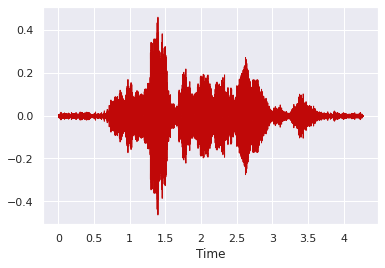

In [10]:
#ANGER
angfile = audio_df[audio_df['Label'] == 'ANG']['Filepath']
angarray = audio_df[audio_df['Label'] == 'ANG']['Arrays']

librosa.display.waveshow(angarray.iloc[0], color='#C00808')
IPython.display.Audio(angfile.iloc[0])

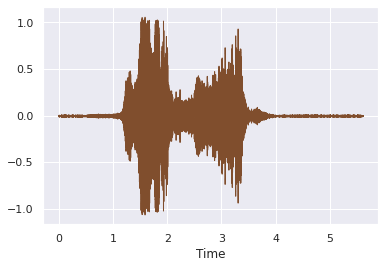

In [11]:
#DISGUST
disfile = audio_df[audio_df['Label'] == 'DIS']['Filepath']
disarray = audio_df[audio_df['Label'] == 'DIS']['Arrays']

librosa.display.waveshow(disarray.iloc[0], color='#804E2D')
IPython.display.Audio(disfile.iloc[0])

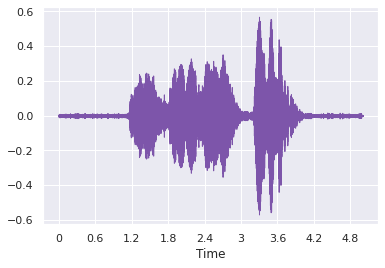

In [12]:
#FEAR
feafile = audio_df[audio_df['Label'] == 'FEA']['Filepath']
feaarray = audio_df[audio_df['Label'] == 'FEA']['Arrays']

librosa.display.waveshow(feaarray.iloc[0], color='#7D55AA')
IPython.display.Audio(feafile.iloc[0])

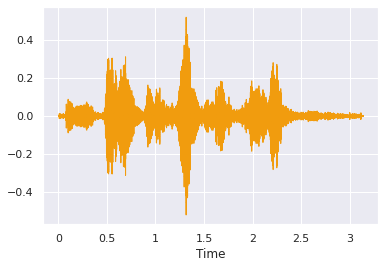

In [13]:
#HAPPINESS
hapfile = audio_df[audio_df['Label'] == 'HAP']['Filepath']
haparray = audio_df[audio_df['Label'] == 'HAP']['Arrays']

librosa.display.waveshow(haparray.iloc[0], color='#F19C0E')
IPython.display.Audio(hapfile.iloc[0])

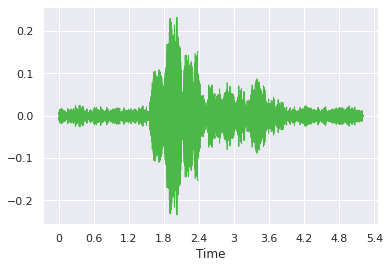

In [14]:
#NEUTRAL
neufile = audio_df[audio_df['Label'] == 'NEU']['Filepath']
neuarray = audio_df[audio_df['Label'] == 'NEU']['Arrays']

librosa.display.waveshow(neuarray.iloc[0], color='#4CB847')
IPython.display.Audio(neufile.iloc[0])

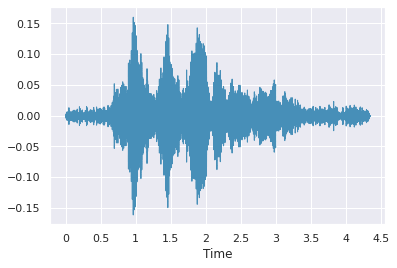

In [15]:
#SADNESS
sadfile = audio_df[audio_df['Label'] == 'SAD']['Filepath']
sadarray = audio_df[audio_df['Label'] == 'SAD']['Arrays']

librosa.display.waveshow(sadarray.iloc[0], color='#478FB8')
IPython.display.Audio(sadfile.iloc[0])

In [16]:
#Data Augmentation
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data,rate=rate)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

In [17]:
#Extracting Features
def extract_features(data):
    # Zero Crossing Rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, chroma_stft))     

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mfcc))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mel))
    
    # Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sr).T, axis=0);
    result = np.hstack((result, tonnetz));
    
    return result

In [18]:
def get_features(data):
    result = []
    
    # without augmentation
    res1 = extract_features(data)
    result.append(res1)
    
    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result.append(res2)
    
    # with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sr)
    res3 = extract_features(data_stretch_pitch)
    result.append(res3)
    
    return result

In [19]:
warnings.filterwarnings('ignore')

x = []
y = []
audio_df = audio_df.iloc[:2000,:]
for i in range(len(audio_df)):
    print(i)
    feature=get_features(audio_df['Arrays'].iloc[i]);
    for j in feature:
        x.append(j)
        y.append(audio_df['Label'].iloc[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [20]:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y))
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [21]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.1)

In [22]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((5400, 167), (5400, 6), (600, 167), (600, 6))


In [23]:
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)

In [24]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((5400, 167, 1), (5400, 6), (600, 167, 1), (600, 6))


In [25]:
#Creating the model
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0005),
             metrics=['accuracy'])

model.summary()

2024-04-24 20:44:06.413226: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-24 20:44:06.413288: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-24 20:44:06.413329: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (past-HP-Pavilion-Laptop-15-eh1xxx): /proc/driver/nvidia/version does not exist
2024-04-24 20:44:06.413881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 20:44:06.529588: W tensorflow/tsl/frame

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 165, 128)          512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 165, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 163, 256)          98560     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 163, 256)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 161, 512)          393728    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 161, 512)         0

2024-04-24 20:44:06.652292: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 333447168 exceeds 10% of free system memory.


In [26]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/50


2024-04-24 20:44:10.108905: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 333447168 exceeds 10% of free system memory.
2024-04-24 20:44:10.752582: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 333447168 exceeds 10% of free system memory.


43/43 [==============================] - 74s 2s/step - loss: 3.1402 - accuracy: 0.1939 - val_loss: 1.6893 - val_accuracy: 0.2567
Epoch 2/50
43/43 [==============================] - 82s 2s/step - loss: 1.6901 - accuracy: 0.2667 - val_loss: 1.6467 - val_accuracy: 0.2417
Epoch 3/50
43/43 [==============================] - 83s 2s/step - loss: 1.6314 - accuracy: 0.2954 - val_loss: 1.5435 - val_accuracy: 0.3467
Epoch 4/50
43/43 [==============================] - 84s 2s/step - loss: 1.5916 - accuracy: 0.3057 - val_loss: 1.5399 - val_accuracy: 0.3550
Epoch 5/50
43/43 [==============================] - 82s 2s/step - loss: 1.5636 - accuracy: 0.3328 - val_loss: 1.5412 - val_accuracy: 0.4233
Epoch 6/50
43/43 [==============================] - 81s 2s/step - loss: 1.5461 - accuracy: 0.3372 - val_loss: 1.4873 - val_accuracy: 0.3717
Epoch 7/50
43/43 [==============================] - 84s 2s/step - loss: 1.5429 - accuracy: 0.3563 - val_loss: 1.4491 - val_accuracy: 0.4267
Epoch 8/50
43/43 [=============

KeyboardInterrupt: 

In [ ]:
# Save the model
model.load("emotion_detection_final.h5")

19/19 [==============================] - 2s 116ms/step


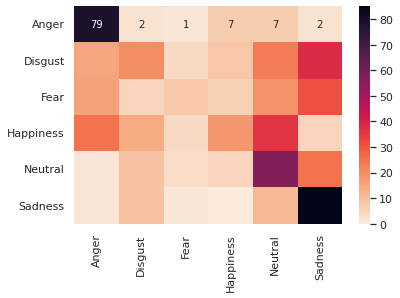

In [27]:
#Evaluationg Model
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

In [85]:
model.predict(x_test)

1/1 [==============================] - 0s 136ms/step


array([[2.38511395e-02, 1.40492737e-01, 1.51761442e-01, 1.63147256e-01,
        7.04446062e-02, 4.50302899e-01],
       [4.46434855e-01, 2.90709510e-02, 5.21628201e-01, 2.35014898e-03,
        1.01077931e-04, 4.14743292e-04],
       [6.47477284e-02, 1.45383120e-01, 2.08554521e-01, 1.62647411e-01,
        8.96297544e-02, 3.29037458e-01],
       [3.68731767e-02, 4.00169902e-02, 6.88881993e-01, 9.29858536e-02,
        7.28039211e-03, 1.33961603e-01],
       [4.89959419e-02, 1.18486427e-01, 2.49322951e-01, 1.42195642e-01,
        5.55334799e-02, 3.85465652e-01],
       [2.75817722e-01, 3.88746500e-01, 1.92422926e-01, 6.59451932e-02,
        2.97804549e-02, 4.72872704e-02],
       [7.60488361e-02, 1.74729496e-01, 1.76037878e-01, 1.72162697e-01,
        1.20220989e-01, 2.80800134e-01],
       [5.34504615e-02, 1.25115514e-01, 2.39580721e-01, 1.54524371e-01,
        6.40735924e-02, 3.63255441e-01],
       [6.33549243e-02, 1.21933475e-01, 2.56177992e-01, 1.78948089e-01,
        8.00886378e-02, 

In [96]:
file_path = 'archive/Crema/1017_WSI_HAP_XX.wav'
audio_data, sr = librosa.load(file_path, sr=44100)

In [110]:
first_instance_prediction = model.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 77ms/step


In [112]:
predicted_class_index = np.argmax(first_instance_prediction)
predicted_class_label = le.inverse_transform([predicted_class_index])[0]
print("Predicted class label:", predicted_class_label)

Predicted class label: SAD


In [121]:
file_path = 'archive/Crema/1017_WSI_HAP_XX.wav'
audio_data, sr = librosa.load(file_path, sr=44100)
feature=get_features(audio_data)
feature = feature[0]
x = np.array(feature)
instance = np.expand_dims(x, axis=0)
instance = np.expand_dims(instance, axis=2)
first_instance_prediction = model.predict(np.expand_dims(instance[0], axis=0))
predicted_class_index = np.argmax(first_instance_prediction)
predicted_class_label = le.inverse_transform([predicted_class_index])[0]
print("Predicted class label:", predicted_class_label)

In [136]:
# Save the model
model.save("emotion_detection.h5")